In [1]:
from my_ai_utils import *

In [2]:
df = pd.read_csv("iris.data.csv", header=None, names=['sepal_length', 'sepal_width',
                                          'petal_length', 'petal_width', 'category'])
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\Junior\AppData\Local\Temp\ipykernel_66320\2525121033.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


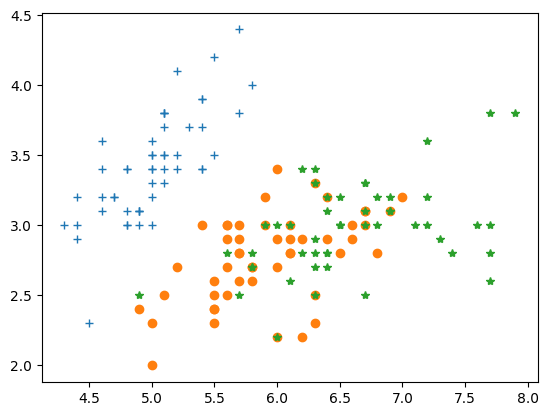

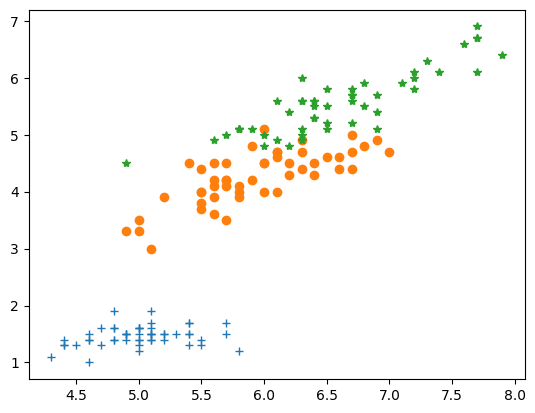

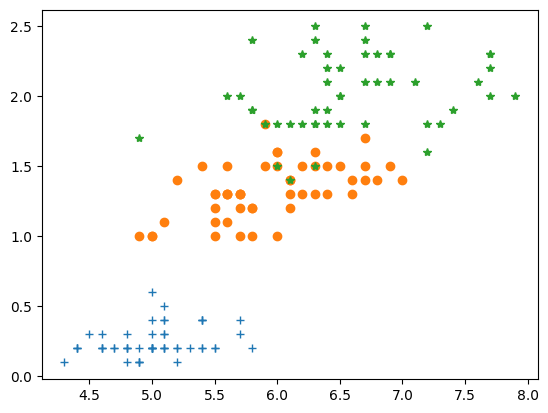

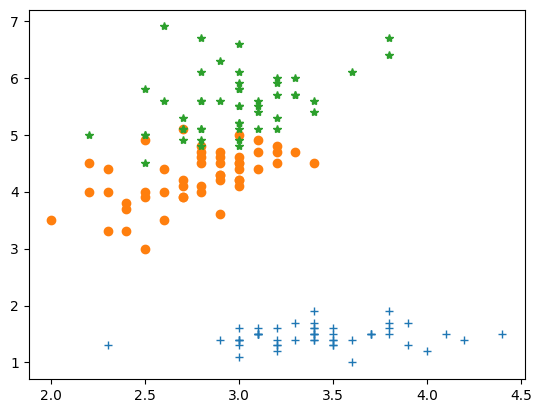

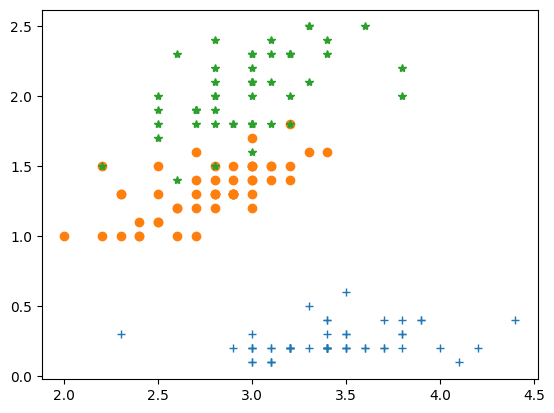

In [3]:
real_set = np.array(df)
size = len(real_set)
for e in range(0, 2):
    for j in range(1, 4):
        if e != j:
            category1 = np.array([(real_set[:, e][i], real_set[:, j][i]) for i in range(size) if real_set[:, -1][i] == "Iris-setosa"])
            category2 = np.array([(real_set[:, e][i], real_set[:, j][i]) for i in range(size) if real_set[:, -1][i] == "Iris-versicolor"])
            category3 = np.array([(real_set[:, e][i], real_set[:, j][i]) for i in range(size) if real_set[:, -1][i] == "Iris-virginica"])

            f = plt.figure()
            plt.plot(category1[:, 0], category1[:, 1], '+')
            plt.plot(category2[:, 0], category2[:, 1], 'o')
            plt.plot(category3[:, 0], category3[:, 1], '*')

            f.show()


Epoch 0:  Loss is 1.9649798207510543 
Epoch 1:  Loss is 1.9086243825369762 
Epoch 2:  Loss is 1.9077562356808995 
Epoch 3:  Loss is 1.9091811856926892 
Epoch 4:  Loss is 1.9096371154934766 
Epoch 5:  Loss is 1.909724286417459 
Epoch 6:  Loss is 1.909711909013367 
Epoch 7:  Loss is 1.9096760811751232 
Epoch 8:  Loss is 1.9096364081587138 
Epoch 9:  Loss is 1.9095977227285856 
Epoch 10:  Loss is 1.909561090428248 
Epoch 11:  Loss is 1.9095266277848686 
Epoch 12:  Loss is 1.9094942227400205 
Epoch 13:  Loss is 1.9094637189082766 
Epoch 14:  Loss is 1.909434961814268 
Epoch 15:  Loss is 1.9094078093873117 
Epoch 16:  Loss is 1.9093821332669099 
Epoch 17:  Loss is 1.9093578178707322 
Epoch 18:  Loss is 1.9093347590425558 
Epoch 19:  Loss is 1.9093128627403009 
Epoch 20:  Loss is 1.9092920438648224 
Epoch 21:  Loss is 1.9092722252368572 
Epoch 22:  Loss is 1.9092533367074274 
Epoch 23:  Loss is 1.9092353143838012 
Epoch 24:  Loss is 1.9092180999544799 
Epoch 25:  Loss is 1.9092016400989804 


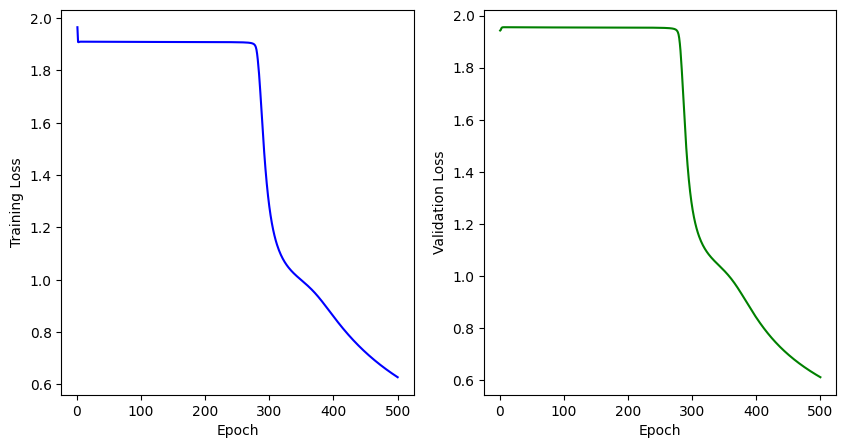

 
Your model accuracy is  100.0% on this dataset 
 


In [7]:
real_set = np.array(pd.read_csv("iris.data.csv"))
np.random.shuffle(real_set)

size = len(real_set)
X_set = real_set[:,:-1]
Y_set = real_set[:,-1]
X_set = np.hstack((X_set, np.ones(len(Y_set)).reshape((-1, 1))))

train_and_validation_size = int(size*((70+15)/100))
_train_set = X_set[:train_and_validation_size, :]
_train_y = Y_set[:train_and_validation_size]

_test_set = X_set[train_and_validation_size: , :]
_test_y = Y_set[train_and_validation_size:]


iris_model = NetModel(input_shape=(4, ), usage="MultiClassification")
iris_model.add_layer(Dense(4, activation_function="sigmoid"))

iris_model.compile(3, categories=['Iris-setosa','Iris-versicolor', 'Iris-virginica'])

iris_model.train(_train_set, _train_y,"cross_entropy", nepochs= 500, learning_rate=0.01, validation_per=15/(70+15))
iris_model.display_losses()
z = iris_model.predict_sample(_test_set,_test_y )

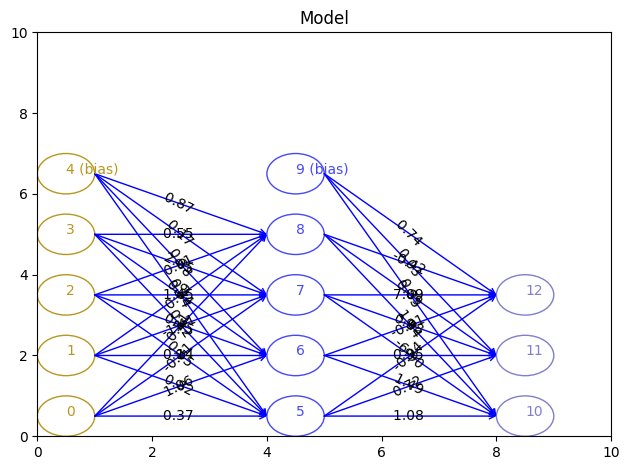

 
Your model accuracy is  100.0% on this dataset 
 


In [11]:
best_model = load("./perfectmodel")
best_model.draw()
a = best_model.predict_sample(_test_set,_test_y )